In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./DataSet/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Machine Learning Algorithm: Multiple Linear Regression
#### General Equation: $Y$ = $β_0 + β_1x_1 + β_2x_2 + .... + β_kx_k + ε$

#### Splitting Data-Frame to Test & Train dataframes

In [5]:
heart_X = df.drop('target',axis=1)
heart_Y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(heart_X, heart_Y, test_size=0.2, random_state=42)

#### Model Building

In [7]:
X = x_train.to_numpy()
Y = y_train.to_numpy()

#### Normal Equation:                      $X'X\hat{β}$ = $X'Y$
#### Least Square Estimate of β :           $\hat{β}$ = $(X'X)^{-1} X'Y$

In [8]:
def cal_beta(X,Y):
    trans_X = X.transpose()
    mul1 = np.matmul(trans_X,X)
    mul2 = np.matmul(trans_X,Y)
    inv_mul1 = np.linalg.inv(mul1)
    
    return np.matmul(inv_mul1,mul2)

In [9]:
beta = cal_beta(X,Y)
print('The dimension of beta: {}'.format(beta.shape))

The dimension of beta: (13,)


#### Fitted Regression Model:  $\hat{y_i}$ = $\hat{β_0} + \sum_{j=1}^{k} \hat{β_j}x_{ij}$ , where we have $\hat{β_0},...,\hat{β_{12}}$

#### In Matrix notation, the fitted Model is:     $\hat{y}$ = $X\hat{β}$

In [10]:
for i in range(0,beta.shape[0]):
    print('β{} = {}'.format(i,beta[i]))

β0 = 0.0034486433063454502
β1 = -0.1682297991385454
β2 = 0.10418115807100636
β3 = -0.0005843663520501419
β4 = -7.27683022132275e-05
β5 = 0.006737830979235304
β6 = 0.07188023575358804
β7 = 0.004494824320227714
β8 = -0.14501397230172192
β9 = -0.05715627708486645
β10 = 0.11853541044958016
β11 = -0.11234597630855184
β12 = -0.10645747854966503


### Calculating $\hat{Y}$ matrix (Predicted values)

In [11]:
def predict(b,x):
    return np.matmul(x,b)

y_pred = predict(beta,x_test.to_numpy())
y_pred

array([ 0.14444841,  0.72989287,  0.79002525,  0.08014047,  0.87252697,
        0.92351065,  0.50413212, -0.25786052, -0.19969343,  0.46282194,
        0.65888972,  0.3164397 ,  0.87922178, -0.05447025,  1.05576143,
        0.92618522,  1.05623143,  0.12078613, -0.17619953, -0.0462337 ,
        0.71073314, -0.15779854,  0.21493619,  0.81020337,  0.79127412,
        0.66780674,  0.82042817,  0.62202641, -0.1200428 ,  0.82850165,
        0.03275498,  0.11729038, -0.20052342,  0.16542089,  0.65882227,
        0.22212134,  0.64646335,  0.77932628,  0.75059182,  0.75653562,
        0.52886959,  0.72970155,  0.72000164,  0.63642524,  0.76561287,
       -0.26650109,  0.61763185,  0.95538602,  0.22962278,  0.05474446,
        0.13166271, -0.14065603,  0.66095929,  1.03539724,  0.39853662,
       -0.25064649,  0.18185131,  0.9516113 ,  0.06061288, -0.15888046,
        0.12475888])

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
print('R2 Score = {}'.format(score))
print('Mean Squared Error = {}'.format(MSE))

R2 Score = 0.5306424655389936
Mean Squared Error = 0.11705557430255684


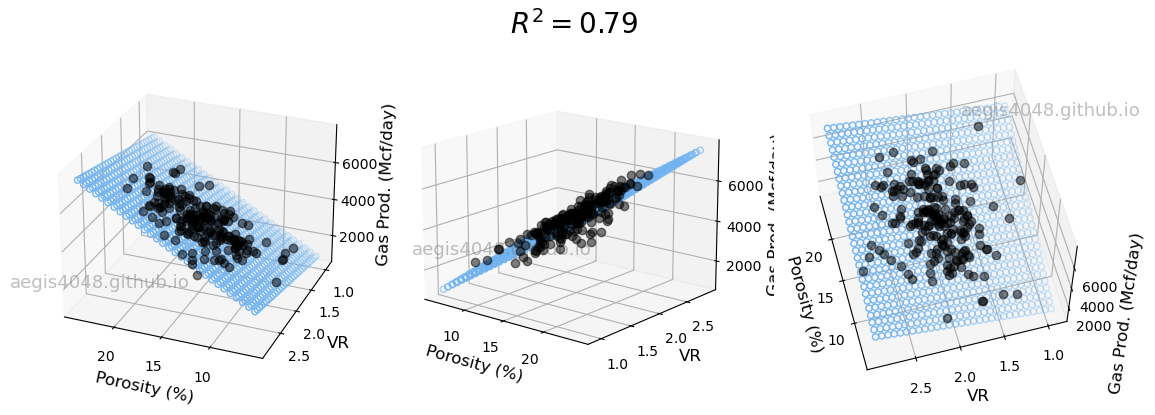

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()